In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer #Reemplazo de datos faltantes
import numpy as np

datos = pd.read_csv('D:/lvs/Master/ProyectoTFM/datos/Post-Procesing/df_tablaCD_metGBA.csv')

In [2]:
#Creamos conjuntos de datos
X = datos.iloc[:,1:-1].values
y = datos.iloc[:,-1].values

In [3]:
#Dividir concunto de entrenamiento y de testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
#Ajustar el modelo de Regresion Lineal multiple
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
y_pred = regression.predict(X_test)

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
kf = KFold(n_splits=5)

scores = cross_val_score(regression, X_train, y_train, cv=kf, scoring='r2')
print("Validacion cruzada:")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

print('Metricas sobre la prediccion')
print('R^2:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print('RMSE:',sqrt(mean_squared_error(y_test, y_pred)))

Validacion cruzada:
Metricas cross_validation [0.59913695 0.49560889 0.63118437 0.42851571 0.44996296]
Media de cross_validation 0.5208817754886623
Metricas sobre la prediccion
R^2: 0.5853639668502966
MSE: 73.2616747781586
RMSE: 8.559303404959927


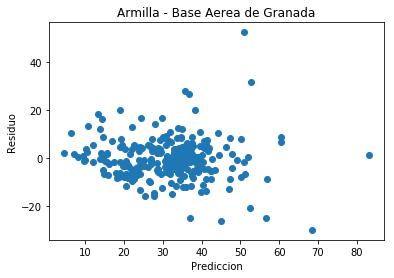

In [19]:
from matplotlib import pyplot as plt
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel('Prediccion')
plt.ylabel('Residuo')
plt.title('Armilla - Base Aerea de Granada')
plt.show()

In [9]:
#Iniciamos la contruccuion optimo del modelo con eliminacion hacia atras

In [10]:
#Construccion del modelo optimo con la eliminacion hacia atras
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((len(X),1)).astype(int), values = X, axis = 1)
SL = 0.05

In [16]:
#quitamos la racha
X_opt = X[:,[0,1,2,4,5,8,11]]
regression_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     216.1
Date:                Sat, 06 Jun 2020   Prob (F-statistic):          1.97e-180
Time:                        17:19:54   Log-Likelihood:                -3910.0
No. Observations:                1075   AIC:                             7834.
Df Residuals:                    1068   BIC:                             7869.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -370.6315     53.610     -6.913      0.000    -475.825    -265.438
x1             0.9028      0.100      9.020      0.000       0.706       1.099
x2            -0.3337      0.109     -3.074      0.002      -0.547      -0.121
x3             0.0440      0.050      0.882      0.378      -0.054       0.142
x4            -0.0541      0.055     -0.981      0.327      -0.162       0.054
x5             0.4050      0.057      7.064      0.000       0.293       0.517
x6             0.2052      0.037      5.534      0.000       0.132       0.278
==============================================================================
Omnibus:                      271.067   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1475.284
Skew:                           1.048   Prob(JB):                         0.00
Kurtosis:                       8.343   Cond. No.                     1.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
regression_opt = LinearRegression()
regression_opt.fit(X_train[:,[0,1,2,4,5,8,11]],y_train)
y_pred_opt = regression_opt.predict(X_test[:,[0,1,2,4,5,8,11]])

#resultado_opt = evaluate(regression_opt, X_test[:,[0,1,2,4,5,8,11]], y_test)
#score_opt = regression_opt.score(X_train[:,[0,1,2,4,5,8,11]],y_train)
print('Metricas sobre la prediccion Modificada')
print('R^2:',r2_score(y_test, y_pred_opt))
print('MSE:',mean_squared_error(y_test, y_pred_opt))
print('RMSE:',sqrt(mean_squared_error(y_test, y_pred_opt)))

Metricas sobre la prediccion Modificada
R^2: 0.5747919137234376
MSE: 75.12964151523599
RMSE: 8.667735662515094


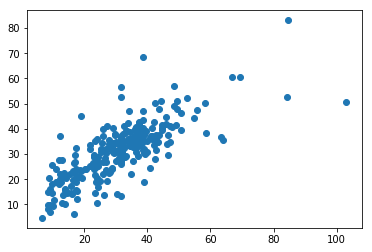

In [18]:
from matplotlib import pyplot as plt
y_pred = regression.predict(X_test)
plt.scatter(y_test, y_pred)